In [67]:
%pylab inline
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [641]:
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=(DataSet[:,0]-min(DataSet[:,0]))/(max(DataSet[:,0])-min(DataSet[:,0]))
    DataSet[:,1]=(DataSet[:,1]-min(DataSet[:,1]))/(max(DataSet[:,1])-min(DataSet[:,1]))
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]

def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
            

In [642]:
def visualize_classifier(model, X, y,namef, ax=None, cmap='tab20b'):
    ax = ax or plt.gca()
 


    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    savefig(namef,dpi=300)

In [593]:
cd OSNR25P0p5mW/

D:\Users\se6537gu\Thesis\MLImplementacion\Nonlinear fiber\OSNR25P0p5mW


In [643]:
data = loadtxt('N0L100x.txt')
Code=loadtxt('PBRS.txt',skiprows=5)
SER=loadtxt('SER.txt',skiprows=2)

In [644]:
INT=[]
for i in range(int(len(Code)/4)):
    INT.append(i*4)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))
Word=[]
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3])
    
vec=array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1]
           ,[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])   
Org=[]
for i in range(len(vec)):
    Org.append(''.join(str(x) for x in vec[i]))

Map=zeros(len(Word))
ColorMap(Word,Map,16)

In [645]:
datamit=[]
datamit.append(data[:,2])
datamit.append(data[:,3])
datamit=transpose(datamit)

In [646]:
shape(datamit)

(2048, 2)

In [647]:
#Normalize IQ data after splice
DataSet=zeros((len(data[:,0]),2))
NormData(DataSet,data)

In [648]:
#Normalize IQ data after splice
DataSetmit=zeros((len(data[:,0]),2))
NormData(DataSetmit,datamit)

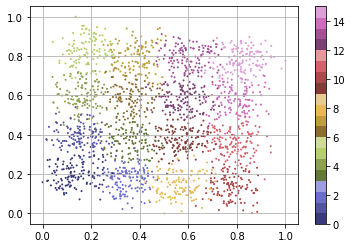

In [649]:
scatter(DataSet[:,0],DataSet[:,1],c=Map,s=1,cmap='tab20b')
colorbar()
grid(True)
savefig('const1.png')

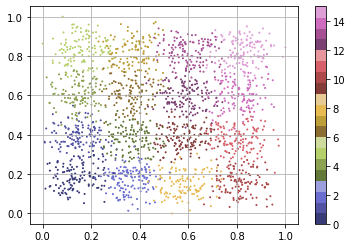

In [650]:
scatter(DataSetmit[:,0],DataSetmit[:,1],c=Map,s=1,cmap='tab20b')
colorbar()
grid(True)
savefig('constmit1.png')

In [652]:
#X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)

#### Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters ={'C': stats.expon(scale=10), 'gamma': stats.expon(scale=5),
                   'kernel': ['rbf'], 'class_weight':['balanced', None]}

scores = ['precision']#, 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(SVC(), tuned_parameters, cv=4,
                       scoring='%s_macro' % score, n_jobs=-1, error_score=0,n_iter=20)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
 

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.05244054770447722, 'class_weight': 'balanced', 'gamma': 4.670799448275828, 'kernel': 'rbf'}

Grid scores on development set:

0.890 (+/-0.014) for {'C': 16.823126055237818, 'class_weight': 'balanced', 'gamma': 7.879771315563158, 'kernel': 'rbf'}
0.893 (+/-0.015) for {'C': 30.95852804315337, 'class_weight': 'balanced', 'gamma': 5.432412060280316, 'kernel': 'rbf'}
0.887 (+/-0.009) for {'C': 0.7797033730840968, 'class_weight': None, 'gamma': 5.305839930457062, 'kernel': 'rbf'}
0.888 (+/-0.015) for {'C': 4.613061020105999, 'class_weight': None, 'gamma': 2.9363614665076776, 'kernel': 'rbf'}
0.891 (+/-0.014) for {'C': 15.359010122661932, 'class_weight': 'balanced', 'gamma': 2.000797819102507, 'kernel': 'rbf'}
0.893 (+/-0.015) for {'C': 0.7691530391962638, 'class_weight': 'balanced', 'gamma': 8.385211735948774, 'kernel': 'rbf'}
0.889 (+/-0.012) for {'C': 5.205855655492897, 'class_weight': 'balanced

In [653]:
best=clf.best_params_

svclassifier = SVC(kernel='rbf',C=best['C'],gamma= best['gamma'],class_weight=best['class_weight'])
svclassifier.fit(X_train, y_train)

SVC(C=0.05244054770447722, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=4.670799448275828,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [654]:
best

{'C': 0.05244054770447722,
 'class_weight': 'balanced',
 'gamma': 4.670799448275828,
 'kernel': 'rbf'}

In [655]:
y_prediction= svclassifier.predict(X_test)

In [656]:
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

[[25  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 18  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0 27  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 16  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0 21  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  1  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 19  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 29  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0 15  1  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  3 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2  0 24  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 22]]
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86        31
         1.0       0.79      0.96      0.87        28
         2.0       0

In [657]:
BER(y_test,y_prediction)

0.1048780487804878

In [658]:
X=SER[0]

In [659]:
print(X[1],X[3])

0.00326201495454354 0.003451500329518


# Random Forest

In [577]:
X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)

In [8]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'n_estimators': [200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [611]:
gridF = GridSearchCV(RandomForestClassifier(), random_grid, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.6min finished


In [612]:
bestF

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [613]:
best=gridF.best_params_
#save=best
#best=save
#save
best

{'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [614]:
forest=RandomForestClassifier(bootstrap=best['bootstrap'],max_depth=best['max_depth'],max_features=best['max_features'],min_samples_leaf=best['min_samples_leaf'],min_samples_split=best['min_samples_split'],n_estimators=best['n_estimators'])
#forest=RandomForestClassifier(max_depth=20,n_estimators=10)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [615]:
y_prediction=forest.predict(X_test)

In [616]:
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  2 21  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 21  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  3  1 22  0  0  0  0  0  5  0  0]
 [ 0  0  1  0  0  0  0  0 22  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0 26  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 27  0  0  2  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0 20  2  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 20  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 30]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       0.93      0.78      0.85        18
         2.0       0

In [617]:
BER(y_test,y_prediction)

0.11951219512195121

In [618]:
print(SER[0][1],SER[0][3])

0.00326201495454354 0.003451500329518


D:\Users\se6537gu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


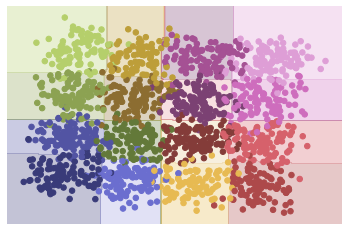

In [619]:
visualize_classifier(forest,X_train,y_train,'forestmapn14noosnr.png')

D:\Users\se6537gu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


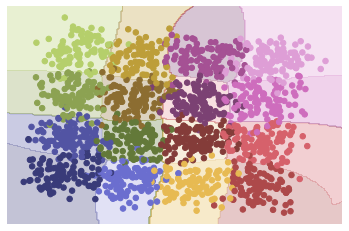

In [620]:
fig=visualize_classifier(svclassifier,X_train,y_train,'Noosnr14SVM')

In [546]:
cd const/

D:\Users\se6537gu\Thesis\MLImplementacion\Nonlinear fiber\const


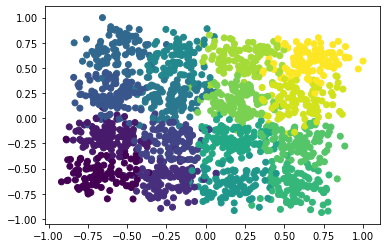

In [621]:
scatter(X_train[:,0],X_train[:,1],c=y_train)

In [460]:
from sklearn import neighbors

In [622]:
clf=neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [623]:
y_prediction=clf.predict(X_test)


In [624]:
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

[[23  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 22  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  1  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 24  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  2 22  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1 19  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 27  0  0  2  0]
 [ 0  0  0  0  0  0  2  0  0  1  0  0 20  2  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 19  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  3 27]]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        25
         1.0       0.88      0.83      0.86        18
         2.0       0

D:\Users\se6537gu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


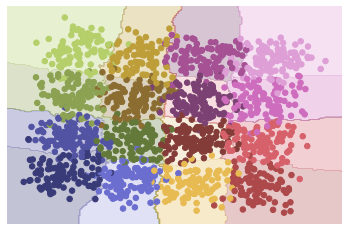

In [625]:
visualize_classifier(clf,X_train,y_train,'kneigh.png')

In [626]:
BER(y_test,y_prediction)

0.12682926829268293